#Predicting Heart Diseases Using Machine Learning 

*Predicting whether he or she having heart diseases or not (binary classification)*

#Data is collected from Kaggale

#Features
##This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

#**##Create data dictionary**

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital) 

anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides

above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results

0: Nothing to note

1: ST-T Wave abnormality

can range from mild symptoms to severe problems

signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy

Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy

colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result

1,3: normal

6: fixed defect: used to be defect but ok now

7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)


##Getting our tools to be ready for the process.

In [2]:
#For Data Analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Models for scitlearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#For Modifing the like adding the missing values and tranforming into numerical

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#For model evalaution:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#Data Exploration(EDA)->Exploratory Data Analysis
##The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1.What question(s) are you trying to solve?
2.What kind of data do we have and how do we treat different types?
3.What's missing from the data and how do you deal with it?
4.Where are the outliers and why should you care about them?
5.How can you add, change or remove features to get more out of your data?

In [3]:
#Load our data
df=pd.read_csv("/content/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
##We need to refer the target column for further information
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

By this we come to know it is a balanced type c;lassification model , Because the target have the equal no of "1" and "0" 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Every elements in the form of integer and float so we don't need to transform it into numerical format

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no misiing element so we don't need to impute anything

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Compare the target column with others to study about the data Deeply

##Compare the frequency of the datas

###Comparing the sex column with the target column

In [ ]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


##We infer that 75% of women having the heart disease(3/4)
## We infer that 50% male having heart diseases and it is not that much predictable 

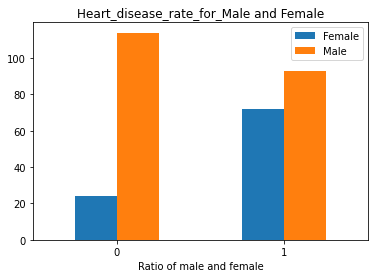

In [ ]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar")
plt.legend(["Female","Male"])
plt.xlabel("Ratio of male and female")
plt.title("Heart_disease_rate_for_Male and Female")
plt.xticks(rotation=0);

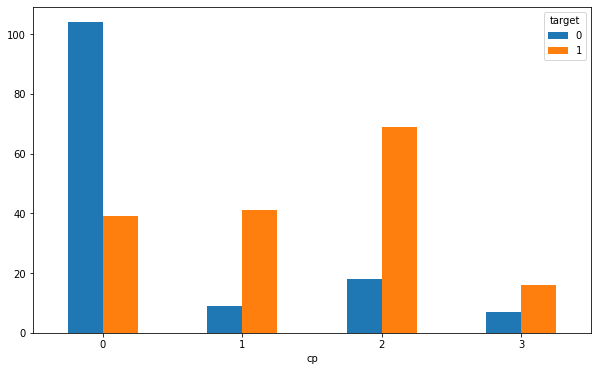

In [ ]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",figsize=(10,6))
plt.xticks(rotation=0);

Let us make the corelation of all the matrix to get the insight in that

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


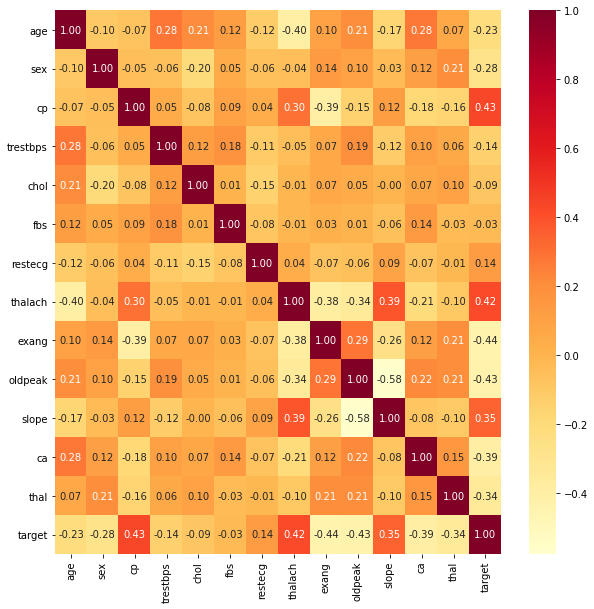

In [ ]:
correl = df.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(correl,annot=True,fmt=".2f",cmap="YlOrRd")


#We need to buid a machine arning mode to predict the case

##We can use three models and seect the best model from that
  *Logistic Regression

  *KNeighbor model
  
  *Random forest model

In [7]:
#Splitting our data
x=df.drop("target",axis=1)
y=df["target"]

#Spliting train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [9]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.7704918032786885}

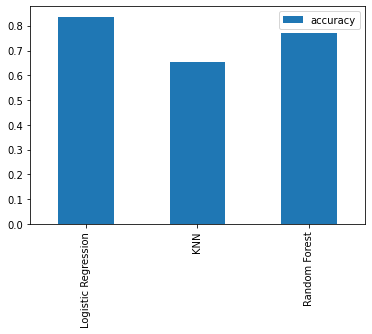

In [10]:
model_compares=pd.DataFrame(model_scores,index=["accuracy"])

model_compares.T.plot(kind="bar")

#We need to tune our models to get more accuracy:

In [11]:
# Train and test scores
train_scores=[]
test_scores=[]

n_neighbors = range(1,21)
knn=KNeighborsClassifier()

for i in n_neighbors:
  knn.set_params(n_neighbors=i)

  knn.fit(x_train,y_train)
  
  

  train_scores.append(knn.score(x_train,y_train))
  
  test_scores.append(knn.score(x_test,y_test))

  

In [ ]:
cross_val_score(knn,x,y,cv=5)

array([0.6557377 , 0.59016393, 0.63934426, 0.71666667, 0.6       ])

In [12]:
max(train_scores)

1.0

In [13]:
max(test_scores)

0.7049180327868853

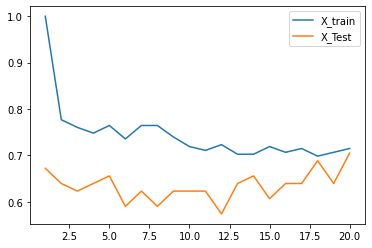

In [14]:
plt.plot(n_neighbors,train_scores,label="X_train")
plt.plot(n_neighbors,test_scores,label="X_Test")
plt.legend()


#We need to tune our LogisticRegression and RandomForestClassifier model 

In [70]:
#Hyperparameters of Logistic and RandomForest in grid

Lg_grid={"C":np.logspace(-2,6,20),"solver":["liblinear"]}

rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}

In [71]:

rs_leg=RandomizedSearchCV(LogisticRegression(),param_distributions=Lg_grid,cv=5,n_iter=20,verbose=True)

#Fit the model
rs_leg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-01, 1.27427499e+00, 3.35981829e+00, 8.85866790e+00,
       2.33572147e+01, 6.15848211e+01, 1.62377674e+02, 4.28133240e+02,
       1.12883789e+03, 2.97635144e+03, 7.84759970e+03, 2.06913808e+04,
       5.45559478e+0

In [72]:
rs_leg.best_params_

{'C': 0.4832930238571752, 'solver': 'liblinear'}

In [73]:
#Score for the tuned Logistic Regression
rs_leg.score(x_test,y_test)

0.8360655737704918

In [ ]:
np.random.seed(42)
rs_Ran=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

#Fit the model of Random Forest
rs_Ran.fit(x_train,y_train)

In [ ]:
rs_Ran.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 310}

In [ ]:
rs_Ran.score(x_test,y_test)

0.8688524590163934

In [29]:
np.random.seed(42)
gs_leg=GridSearchCV(LogisticRegression(),param_grid=Lg_grid,cv=5,verbose=True)

#Fit the model
gs_leg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [30]:
gs_leg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [31]:
gs_leg.score(x_test,y_test)

0.819672131147541

In [ ]:
rs_Ran.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 310}

In [18]:
rf_grid={"n_estimators":np.arange(300,350,10),"max_depth":[None],"min_samples_split":np.arange(10,15,1),"min_samples_leaf":np.arange(1,6,1)}

In [20]:
np.random.seed(42)
gs_Ran=GridSearchCV(RandomForestClassifier(),param_grid=rf_grid,cv=5,verbose=True)

gs_Ran.fit(x_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 625 out of 625 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [21]:
gs_Ran.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 320}

In [22]:
gs_Ran.score(x_test,y_test)

0.7868852459016393

#We need to evaluate the model and calculation the AUC(Area Under Curve)

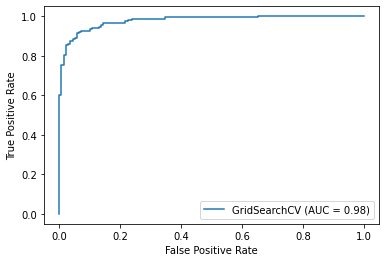

In [ ]:
plot_roc_curve(gs_Ran,x,y)

In [57]:
np.array(y_test)

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [74]:
y_pred=rs_leg.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

We need to do the confusion matrix to test that

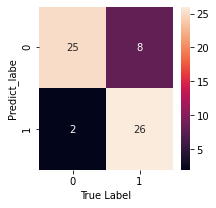

In [75]:
def plot_con_mat(y_test,y_pred):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
  plt.xlabel("True Label")
  plt.ylabel("Predict_labe")

plot_con_mat(y_test,y_pred)

We will do the classification report

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



Now will do the Cross validation to split the data into different splits of test and train data

In [83]:
clf=LogisticRegression(C=0.4832930238571752, solver='liblinear')
clf

LogisticRegression(C=0.4832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.4832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy").mean()

In [89]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8315300546448088

In [92]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8139133786192609

In [96]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8548018845463131

In [98]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9030303030303031

Visualise cross_val metrics

In [102]:
tot_cross={"cv_acc":cv_acc,"cv_precision":cv_precision,"cv_f1":cv_f1,"cv_recall":cv_recall}
tot_cross=pd.DataFrame(tot_cross,index=[0])

In [103]:
tot_cross

,cv_acc,cv_precision,cv_f1,cv_recall
0,0.83153,0.813913,0.854802,0.90303


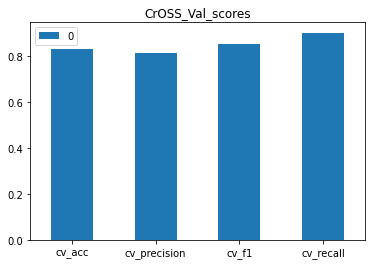

In [110]:
tot_cross.T.plot(kind="bar",title="CrOSS_Val_scores")

plt.xticks(rotation=0);

#We will see the feature imporatnce which mean the features which contrubuting more for the classification

## We will see the Model driven feature importance

In [111]:
clf=LogisticRegression(C=0.4832930238571752, solver='liblinear')
clf

LogisticRegression(C=0.4832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.4832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
clf.coef_

array([[ 0.00381821, -1.04393035,  0.75263972, -0.01467474, -0.00268184,
        -0.21829419,  0.16082188,  0.03073393, -0.75485743, -0.59776157,
         0.40579573, -0.57776308, -0.63288374]])

Match the coef features to columns:

In [119]:
features_dic = dict(zip(df.columns,list(clf.coef_[0])))
features_dic

{'age': 0.0038182146024231724,
 'ca': -0.5777630771590881,
 'chol': -0.002681841989751207,
 'cp': 0.7526397166950207,
 'exang': -0.7548574283488271,
 'fbs': -0.21829419130578115,
 'oldpeak': -0.5977615655665617,
 'restecg': 0.16082188065876532,
 'sex': -1.0439303539502258,
 'slope': 0.4057957309981775,
 'thal': -0.6328837425705353,
 'thalach': 0.030733925030690352,
 'trestbps': -0.014674739594989796}

Visualise the feature_dic

In [121]:
feature_vis=pd.DataFrame(features_dic,index=[0])
feature_vis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003818,-1.04393,0.75264,-0.014675,-0.002682,-0.218294,0.160822,0.030734,-0.754857,-0.597762,0.405796,-0.577763,-0.632884


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

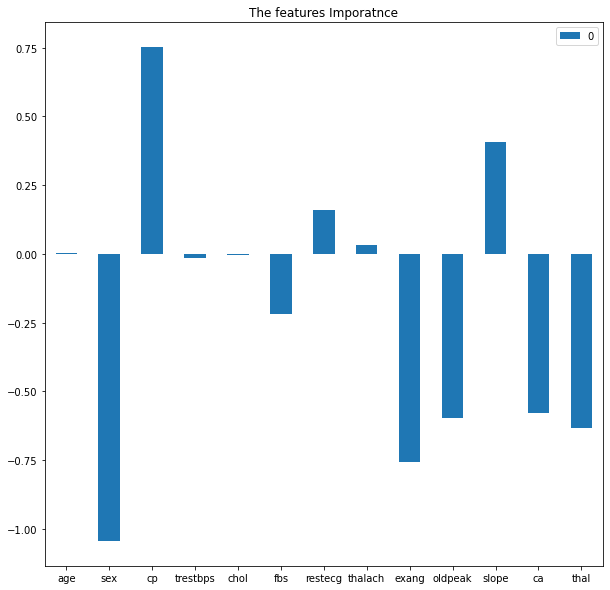

In [124]:
feature_vis.T.plot(kind="bar",title="The features Imporatnce",figsize=(10,10))

plt.xticks(rotation=0)